# Salary Predictions Based on Job Descriptions

The goal of this project is to predict the salaries based on the job descriptions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

## LOAD THE DATA

In [2]:
features_data = pd.read_csv('train_features.csv')
salaries_data = pd.read_csv('train_salaries.csv')
test_data = pd.read_csv('test_features.csv')

In [5]:
features_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [6]:
salaries_data.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [7]:
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [8]:
data = [features_data, salaries_data, test_data]
for i in range(len(data)):
    print(data[i].info(), end="\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType           

In [9]:
for i in range(len(data)):
    print('The shape of the dataset is ',data[i].shape, end="\n\n")

The shape of the dataset is  (1000000, 8)

The shape of the dataset is  (1000000, 2)

The shape of the dataset is  (1000000, 8)



#  CLEAN THE DATA

In [10]:
features_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [11]:
salaries_data.isnull().sum()

jobId     0
salary    0
dtype: int64

In [12]:
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

The above lines of code conclude that there are no null vlaues in the three datasets.

In [13]:
# train_features.duplicated(keep='first').sum()

In [14]:
for i in range(len(data)):
    print(data[i].duplicated().sum(), end="\n\n")

0

0

0



The above line concludes that there are no duplicates in the three datasets.

In [15]:
'''Now that we know that there are no duplicate values and null values, \
we can merge the train_features and train_salaries dataset. '''

train_data = features_data.merge(salaries_data, on='jobId')

In [16]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [18]:
del [features_data, salaries_data] 

'This deletes the two dataframes from the memory'

This deletes the two dataframes from the memory

### Exploratory Data Analysis

In [19]:
train_data.describe() 
# This includes only the numerical columns by default which are Years of experiecne, number of miles, and salary.

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [20]:
''' The number of unique values in the dataset'''
train_data.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [21]:
# We also need to know the descriptive statistics of other data types (non-numerical)
train_data.describe(exclude=[np.number])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684992776,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


The above summarizes that there are 1000000 unique jobIds, 63 unique companyId's, 8 different Job types, 5 different degree holders, 9 different majors, and 7 unique industries

In [22]:
train_data[train_data['salary'] == 0 ]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


We see that there are 0 values in salary which do not make sense for a person having a doctoral degree or a masters degree. Hence, we can drop these values assuming that they are incorrect values.

In [23]:
train_data = train_data[train_data['salary'] != 0]

## Data Visualization

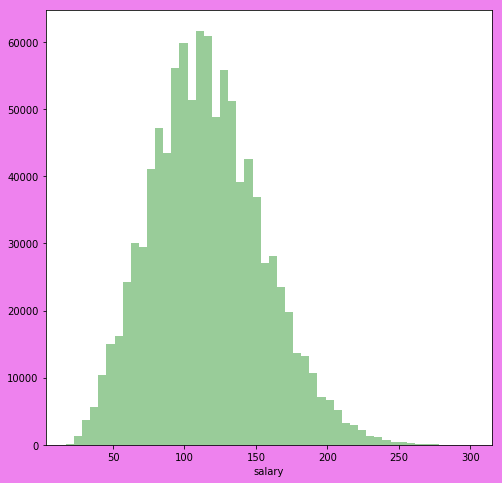

In [24]:
plt.figure(figsize=(8,8), facecolor = 'violet')
sns.distplot(train_data['salary'], kde = False, color = 'green')

[Text(0,0.5,'SALARY'), Text(0.5,0,'MILESFROMMETROPOLIS')]

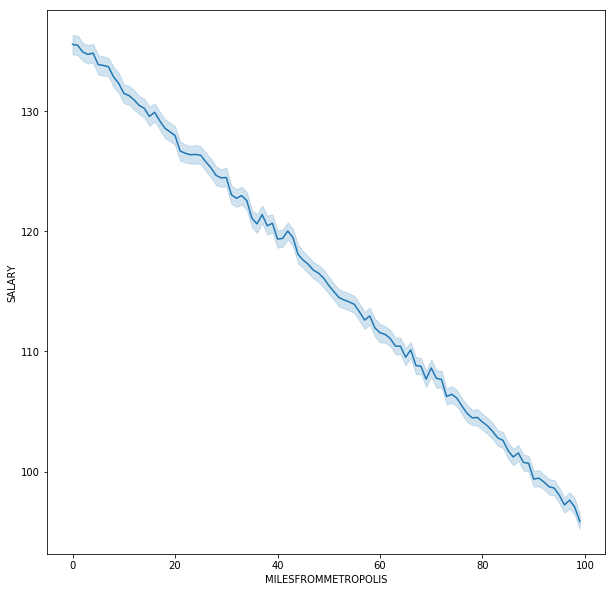

In [25]:
plt.figure(figsize=(10,10))
sns.lineplot('milesFromMetropolis', 'salary', data = train_data).set(xlabel= 'MILESFROMMETROPOLIS', ylabel='SALARY')

[Text(0,0.5,'SALARY'), Text(0.5,0,'YEARSEXPERIENCE')]

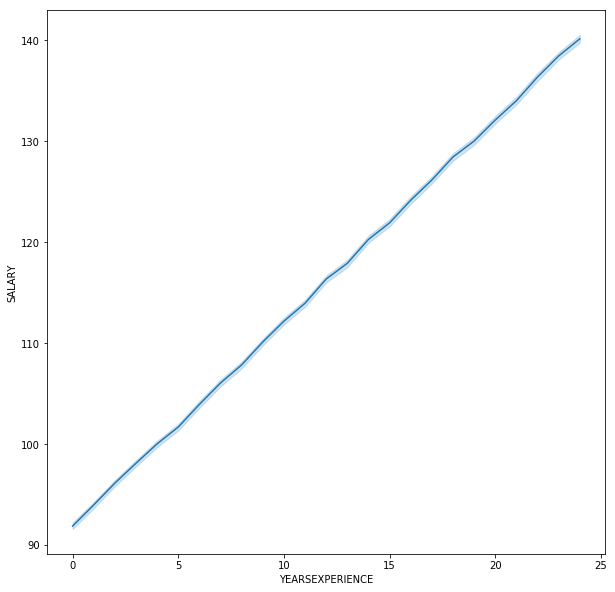

In [26]:
plt.figure(figsize=(10,10))
sns.lineplot('yearsExperience', 'salary', data = train_data).set(xlabel= 'YEARSEXPERIENCE', ylabel='SALARY')

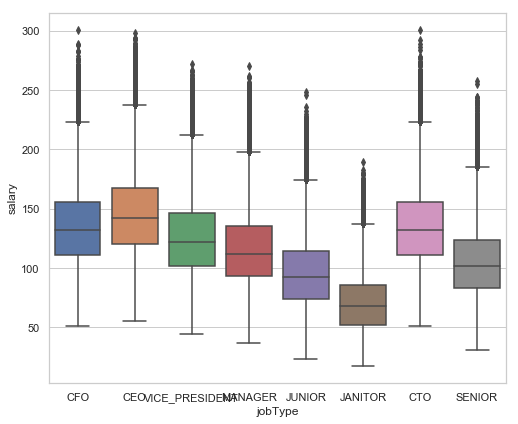

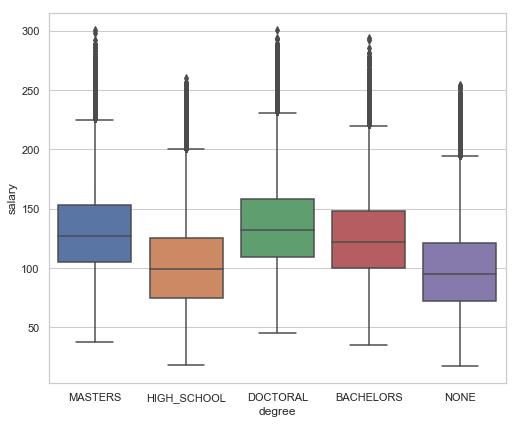

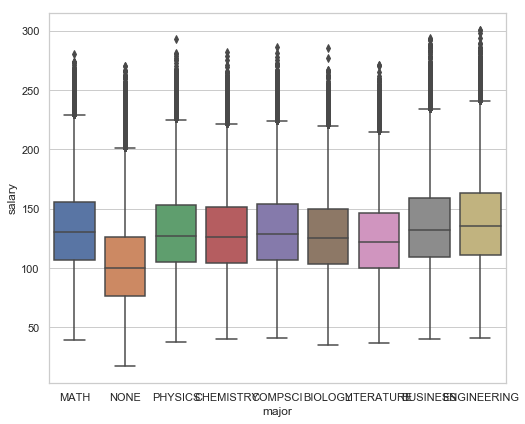

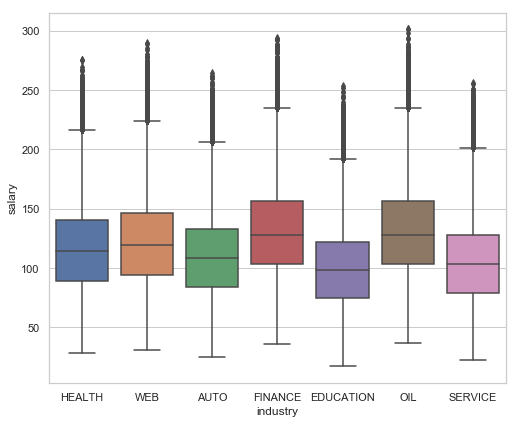

In [27]:
cat_values = ['jobType', 'degree', 'major', 'industry']
for i in range(len(cat_values)):
    plt.figure(figsize=(18,15))
    sns.set(style="whitegrid")
    plt.subplot(2,2,i+1)
    sns.boxplot(x = cat_values[i] , y ='salary', data= train_data)
    

The below plots will show the distribution of salary based on the different features with respect to degree

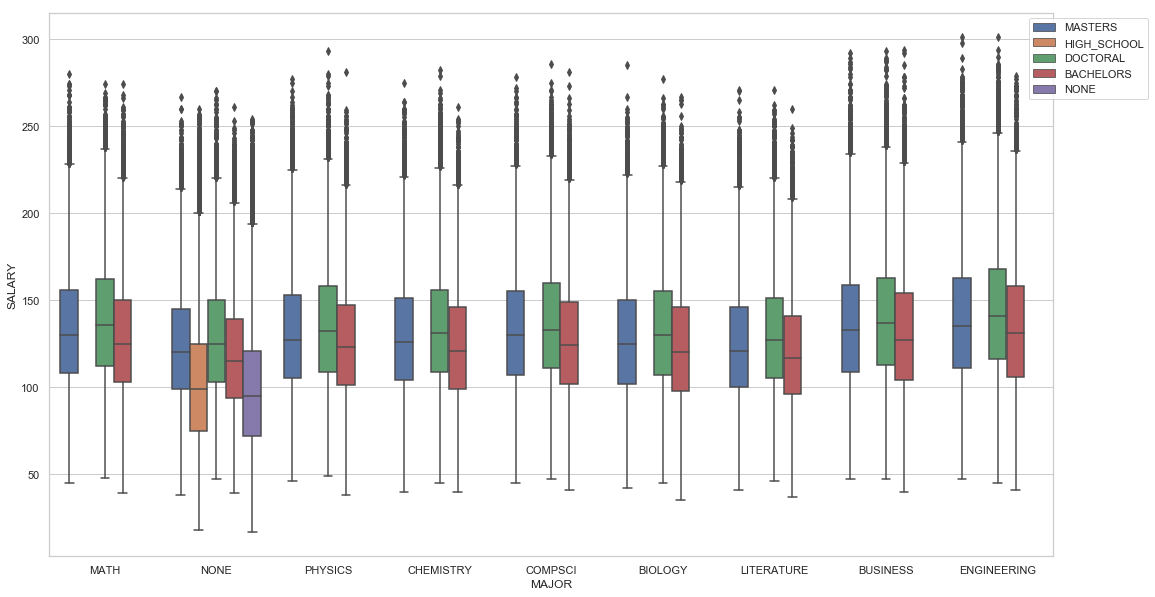

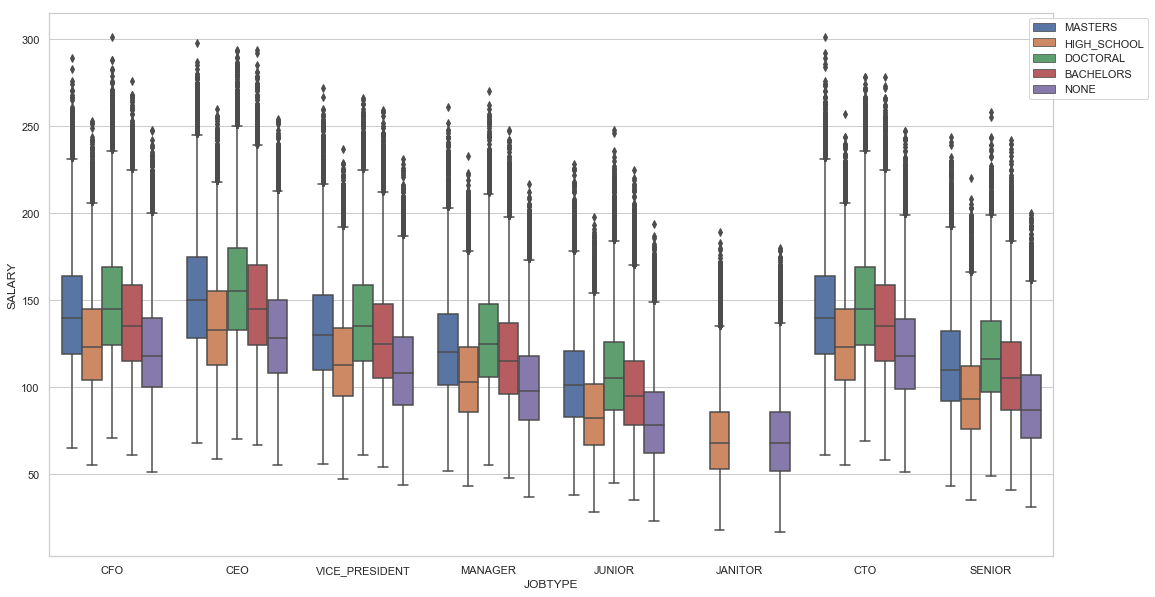

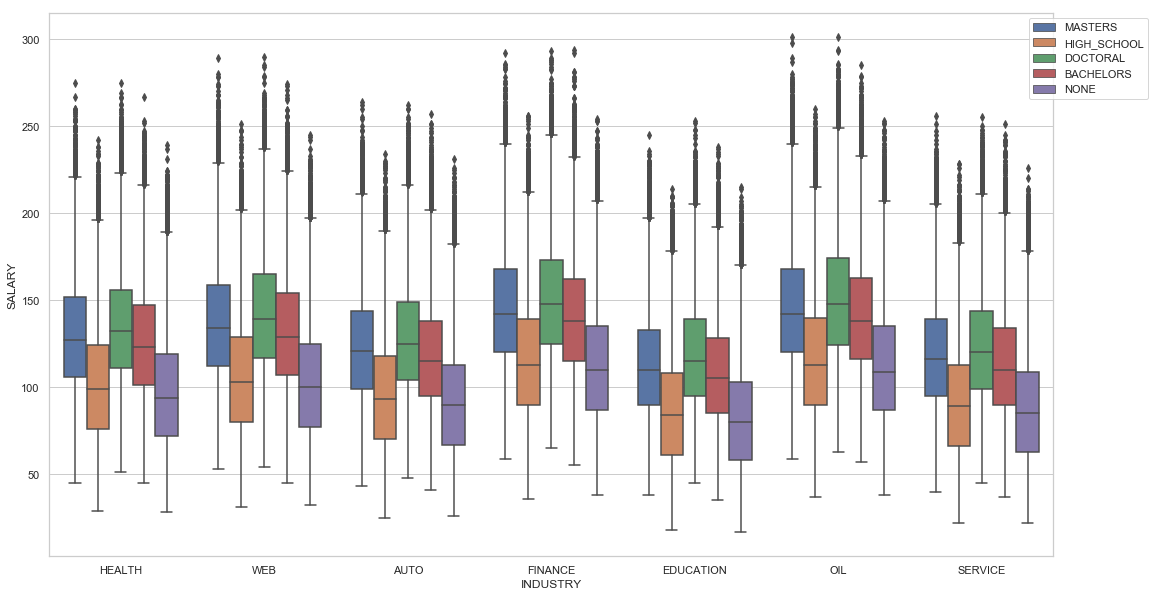

In [29]:
features = ['major', 'jobType', 'industry']
for i in range(len(features)):
    plt.figure(figsize=(18,10))
    sns.boxplot( x = features[i], y ='salary', hue= 'degree', data = train_data)\
    .set(xlabel= features[i].upper(), ylabel='SALARY')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
    plt.show()

## IN PROGRESS